# Data Exploration

In [8]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pandas.plotting import autocorrelation_plot
from sklearn import preprocessing
import statsmodels.api as sm

# Quarterly Data - homelessness

In [64]:
# quarterly data on homelessness and the waiting list
df = pd.read_excel (r"Data/all_in_one_Time_sieries_data_color.xlsx", sheet_name=4)
TA = df.iloc[0:, 3]
# TA_norm = [float(i)/sum(TA) for i in TA]
TA_norm = preprocessing.normalize([TA])[0]

dwellings = df.iloc[0:, 4]
# dwellings_norm = [float(i)/sum(dwellings) for i in dwellings]
dwellings_norm = preprocessing.normalize([dwellings])[0]

main = df.iloc[0:, 5]
# main_norm =  [float(i)/sum(main) for i in main]
main_norm = preprocessing.normalize([main])[0]


C:\Users\linda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='title', ylabel='main'>

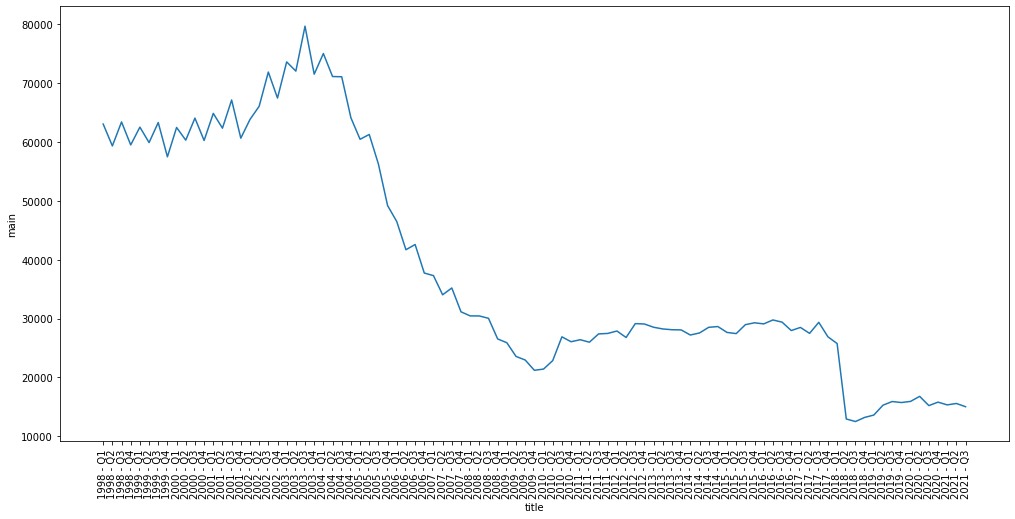

In [24]:
# before removing trend
plt.figure(figsize=(17,8))
plt.xticks(rotation=90)
sns.lineplot(df.iloc[0:, 2],main)
# plt.plot(df.iloc[0:, 2], main_norm, label = "Main Duty Owed")

## Autocorrelation

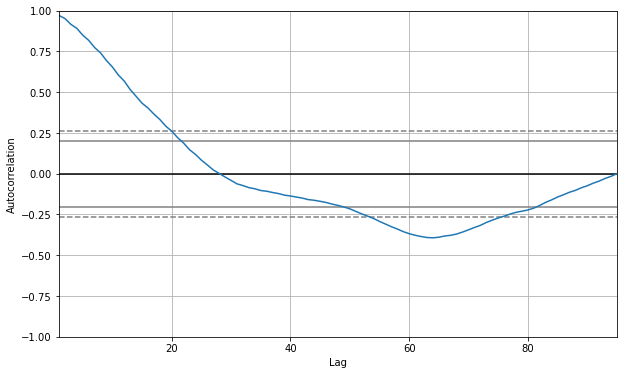

In [25]:
# autocorralation
plt.rc("figure", figsize=(10,6))
pd.plotting.autocorrelation_plot(df['main']);

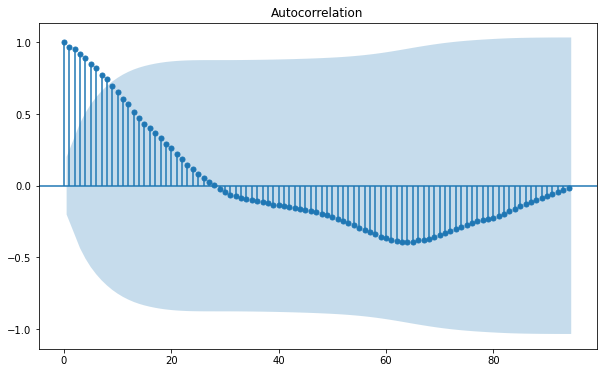

In [26]:
import statsmodels.api as sm
plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_acf(main, lags = 94);

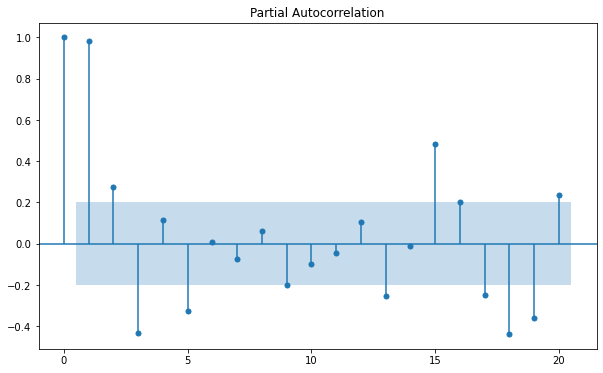

In [27]:
# partial autocorrelation
plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_pacf(df['main']);

## Removing Trend

In [28]:
# removing trend by differencing to make time-sereis data stationary
data = df['main'] - df['main'].shift(1)
# plt.rc("figure", figsize=(10,6))
# sm.graphics.tsa.plot_acf(data[1:], lags=50);


In [217]:
# data1 = df['dwellings'] - df['dwellings'].shift(1)
# plt.rc("figure", figsize=(10,6))
# sm.graphics.tsa.plot_acf(data1[1:], lags=50);

# df_trend = pd.read_excel (r"Data/TS_trend.xlsx", sheet_name=0)
# df_trend.insert(loc=1,
#           column='dwellings',
#           value=data1)
# display(df_trend)

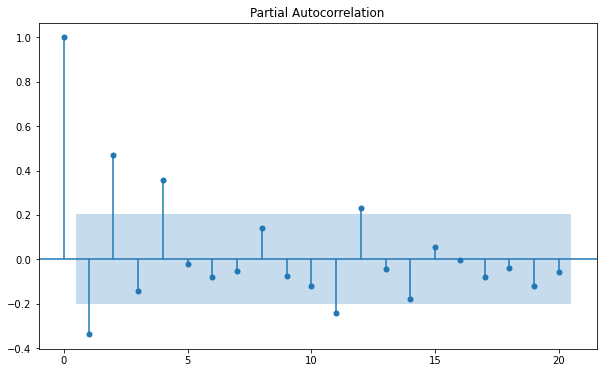

In [29]:
plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_pacf(data[1:]);

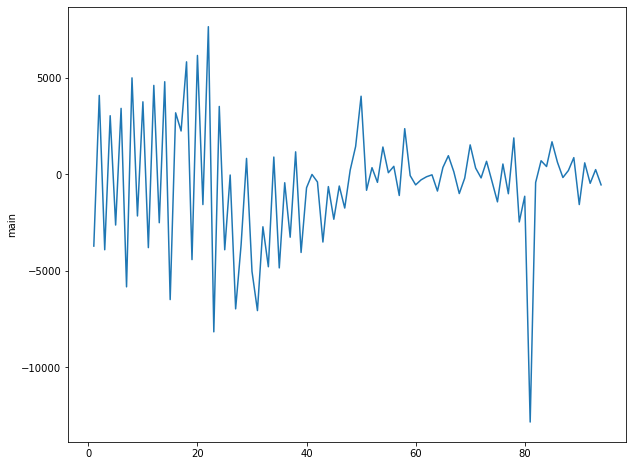

In [30]:
plt.figure(figsize=(10,8))
sns.lineplot(data=data[1:], palette="deep");

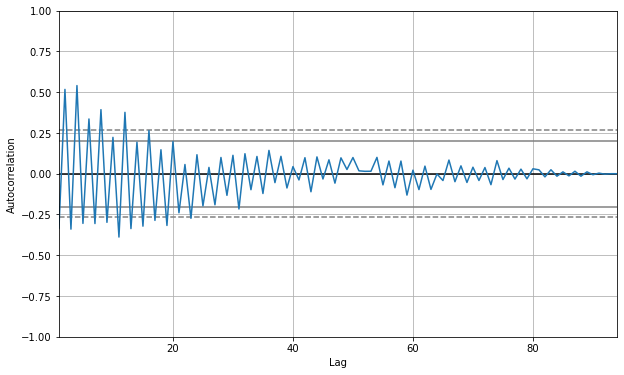

In [31]:
pd.plotting.autocorrelation_plot(data[1:]);

## Stationarity

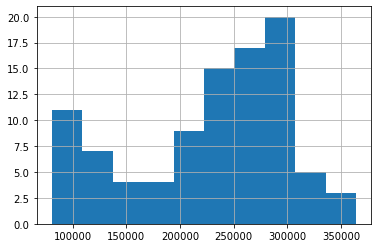

In [285]:
# review summary statistics
df_focus = df['dwellings']
# df_focus = merged_all['price']
df_focus.hist()
plt.show();

In [43]:
# The Augmented Dickey-Fuller test is a type of statistical test called a unit root test. 
# The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

from statsmodels.tsa.stattools import adfuller

X = main.values

result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.240789
p-value: 0.655808
Critical Values:
	1%: -3.505
	5%: -2.894
	10%: -2.584


In [44]:
# try with the removed trend data

X = data[1:].values

result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
    
#p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

ADF Statistic: -2.891976
p-value: 0.046289
Critical Values:
	1%: -3.505
	5%: -2.894
	10%: -2.584


# Forecasting on quarterly homelessness

Text(0, 0.5, 'main')

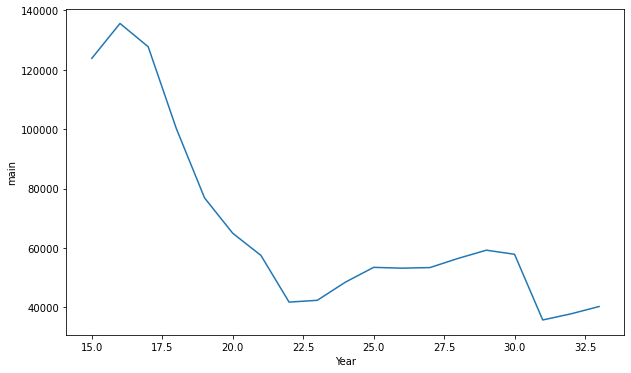

In [79]:
df_focus = homeless2
ax = df_focus.plot()
ax.set_xlabel("Year")
ax.set_ylabel("main")

## Simple Exponential Smoothing

C:\Users\linda\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


18321501864.2837 4880935262.88246 2998440792.708086


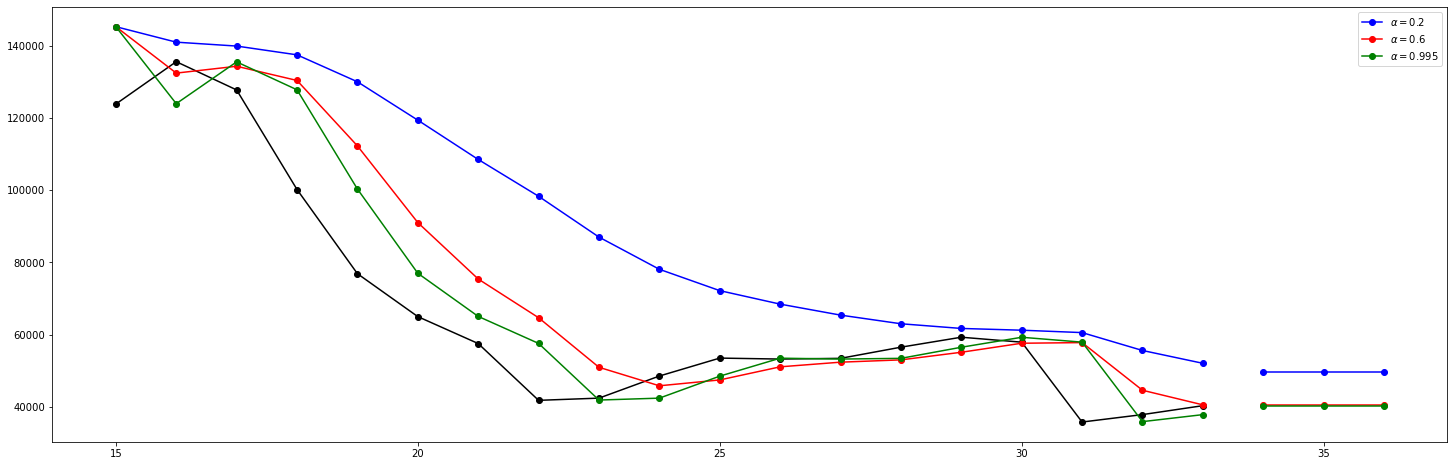

In [415]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

fit1 = SimpleExpSmoothing(df_focus, initialization_method="heuristic").fit(
    smoothing_level=0.2, optimized=False
)
fcast1 = fit1.forecast(3).rename(r"$\alpha=0.2$")
fit2 = SimpleExpSmoothing(df_focus, initialization_method="heuristic").fit(
    smoothing_level=0.6, optimized=False
)
fcast2 = fit2.forecast(3).rename(r"$\alpha=0.6$")
fit3 = SimpleExpSmoothing(df_focus, initialization_method="estimated").fit()
fcast3 = fit3.forecast(3).rename(r"$\alpha=%s$" % fit3.model.params["smoothing_level"])

plt.figure(figsize=(25, 8))
plt.plot(df_focus, marker="o", color="black")
plt.plot(fit1.fittedvalues, marker="o", color="blue")
(line1,) = plt.plot(fcast1, marker="o", color="blue")
plt.plot(fit2.fittedvalues, marker="o", color="red")
(line2,) = plt.plot(fcast2, marker="o", color="red")
plt.plot(fit3.fittedvalues, marker="o", color="green")
(line3,) = plt.plot(fcast3, marker="o", color="green")
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])
print(fit1.sse, fit2.sse, fit3.sse)

## Holts Method


2816337657.039912 2307373463.644164 2743293997.447957


C:\Users\linda\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


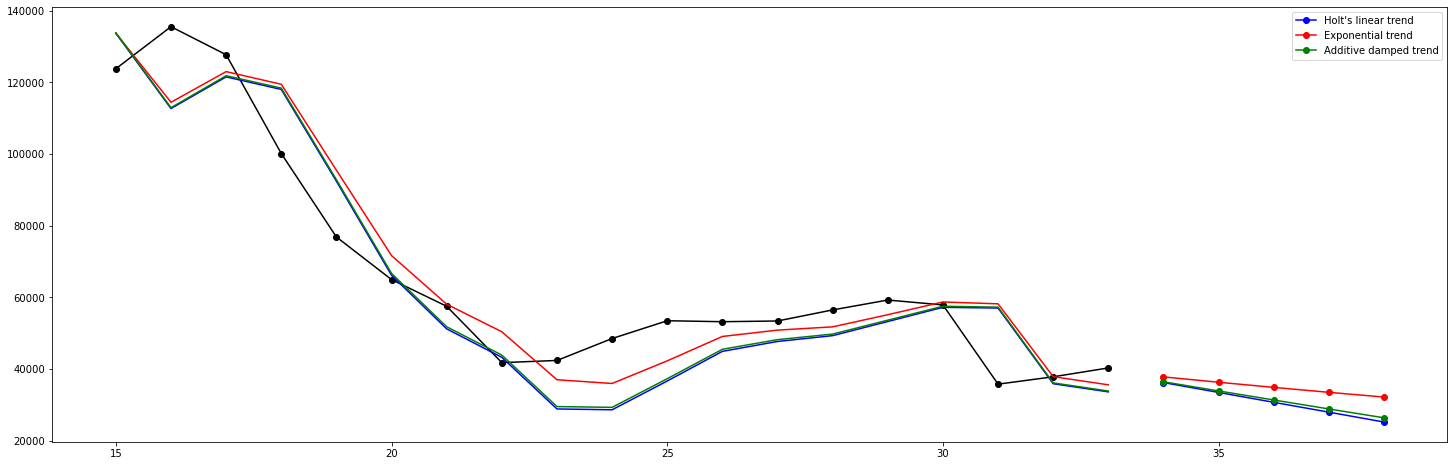

In [336]:
# holts method

fit1 = Holt(df_focus, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2, optimized=False
)
fcast1 = fit1.forecast(5).rename("Holt's linear trend")
fit2 = Holt(df_focus, exponential=True, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2, optimized=False
)
fcast2 = fit2.forecast(5).rename("Exponential trend")
fit3 = Holt(df_focus, damped_trend=True, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2
)
fcast3 = fit3.forecast(5).rename("Additive damped trend")

plt.figure(figsize=(25, 8))
plt.plot(df_focus, marker="o", color="black")
plt.plot(fit1.fittedvalues, color="blue")
(line1,) = plt.plot(fcast1, marker="o", color="blue")
plt.plot(fit2.fittedvalues, color="red")
(line2,) = plt.plot(fcast2, marker="o", color="red")
plt.plot(fit3.fittedvalues, color="green")
(line3,) = plt.plot(fcast3, marker="o", color="green")
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])
print(fit1.sse, fit2.sse, fit3.sse)

## Autoregression

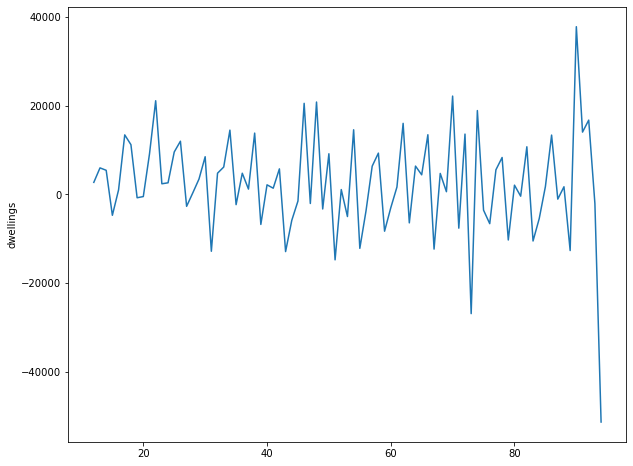

In [196]:
plt.figure(figsize=(10,8))
sns.lineplot(data=data[1:], palette="deep");

In [225]:
# Create training and test data
#
df_trend = pd.read_excel (r"Data/TS_trend.xlsx", sheet_name=0)
train_data = df_trend['main'][:len(df)-100]
test_data = df_trend['main'][len(df)-100:]

In [226]:
# AR example
from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from random import random
# contrived dataset
data = train_data
# fit model1
model = AutoReg(data, lags=5, old_names = True)
model_fit = model.fit()
# # make prediction
# yhat = model_fit.predict(len(data), len(data))
# print(yhat)

print(model_fit.summary())
fig = plt.figure(figsize=(16, 9))
# fig = model_fit.plot_diagnostics(fig=fig, lags=30)

# fig = model_fit.plot_predict(start=None, end=None)

                            AutoReg Model Results                             
Dep. Variable:                   main   No. Observations:                   89
Model:                     AutoReg(5)   Log Likelihood                -778.095
Method:               Conditional MLE   S.D. of innovations           2550.646
Date:                Wed, 27 Apr 2022   AIC                             15.855
Time:                        02:02:33   BIC                             16.057
Sample:                             5   HQIC                            15.936
                                   89                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -274.8444    296.992     -0.925      0.355    -856.939     307.250
main.L1       -0.0192      0.109     -0.176      0.860      -0.233       0.195
main.L2        0.2672      0.102      2.623      0.0

<Figure size 1152x648 with 0 Axes>

No handles with labels found to put in legend.


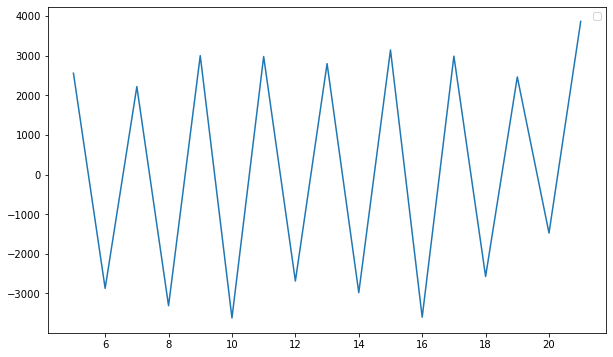

In [238]:
fig = model_fit.plot_predict(start=1, end=21, dynamic=False, exog=None, exog_oos=None, alpha=0.05, in_sample=True, fig=None, figsize=None)

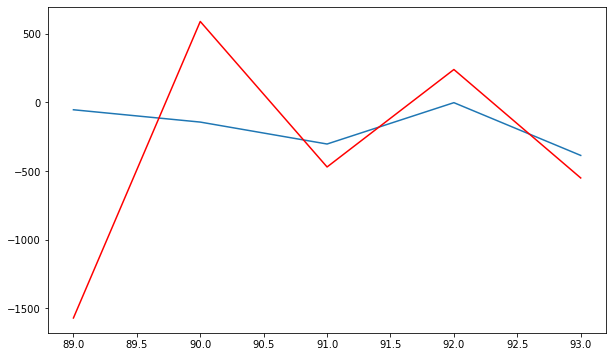

In [236]:
# Make the predictions
#
pred = model_fit.predict(start=len(data), end=(len(df_trend)-1), dynamic=False)

# Plot the prediction vs test data
#
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test_data, color='red')

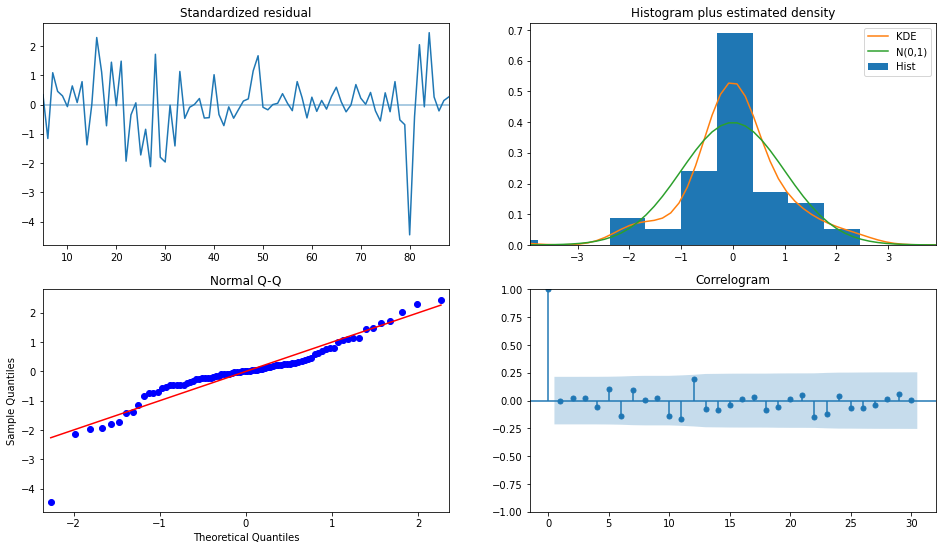

In [237]:
fig = plt.figure(figsize=(16, 9))
fig = model_fit.plot_diagnostics(fig=fig, lags=30)

#  Yearly - waiting list

In [37]:
waiting = pd.read_excel (r"Data/waiting_LQ_data.xlsx", sheet_name=0, skiprows = 1)
waiting = waiting.drop(waiting.iloc[:,2:17], axis=1)
waitingCol = waiting.iloc[0][2:]

allTS = pd.read_excel (r"Data/all_in_one_Time_sieries_data_color.xlsx", sheet_name=0)
waiting2 = allTS.iloc[0:, 5]
allTS['Size_of_waiting_list'] = allTS['Size_of_waiting_list'].fillna(0)
waiting2N = preprocessing.normalize([waiting2])[0]


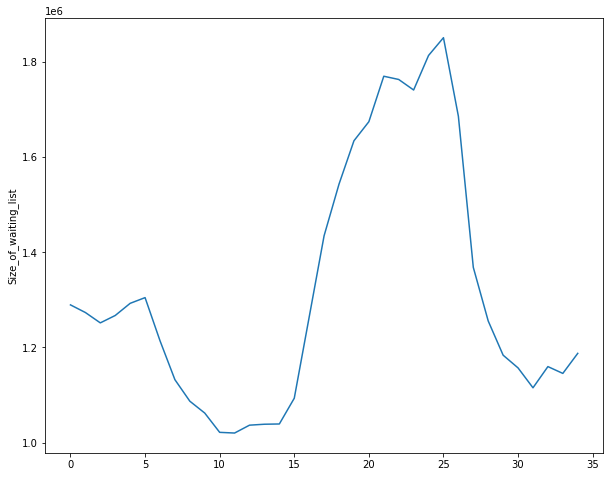

In [38]:
plt.figure(figsize=(10,8))
# sns.lineplot(data=merged['waiting'], palette="deep");
sns.lineplot(data=waiting2, palette="deep");

## Autocorrelation 

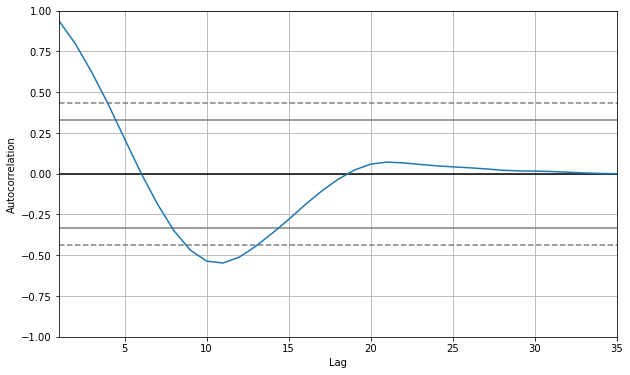

In [49]:
plt.rc("figure", figsize=(10,6))
pd.plotting.autocorrelation_plot(waiting2);

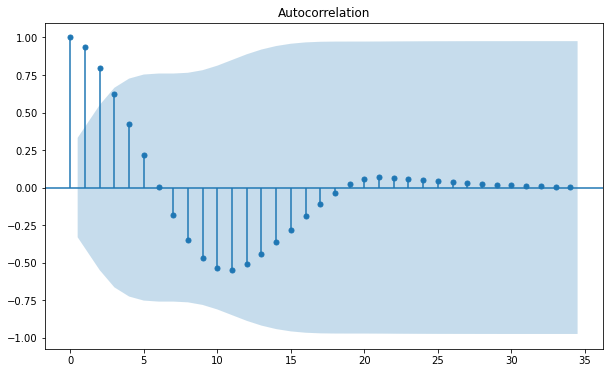

In [53]:
plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_acf(waiting2, lags = 34);

C:\Users\linda\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


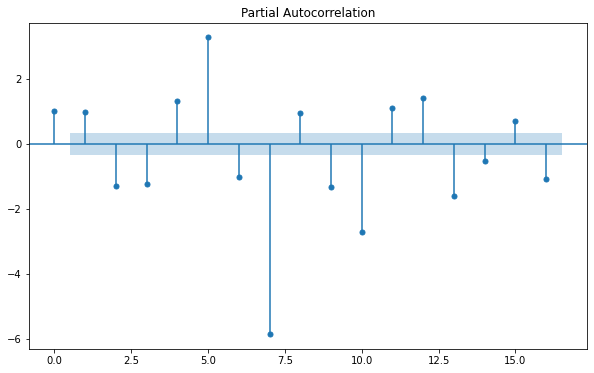

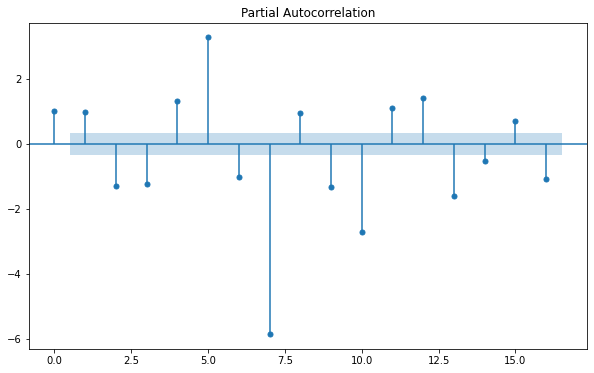

In [86]:
plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_pacf(waiting2[1:])

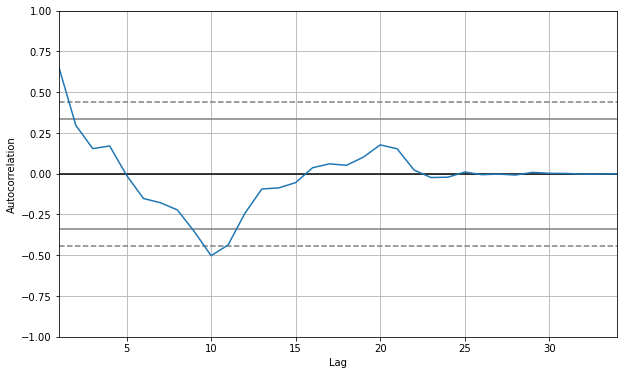

In [63]:
pd.plotting.autocorrelation_plot(data2[1:]);

In [46]:
# stationarity
# try with the removed trend data

X = waiting2.values

result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
    
#p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

ADF Statistic: 0.521925
p-value: 0.985524
Critical Values:
	1%: -3.738
	5%: -2.992
	10%: -2.636


## Removing Trend 

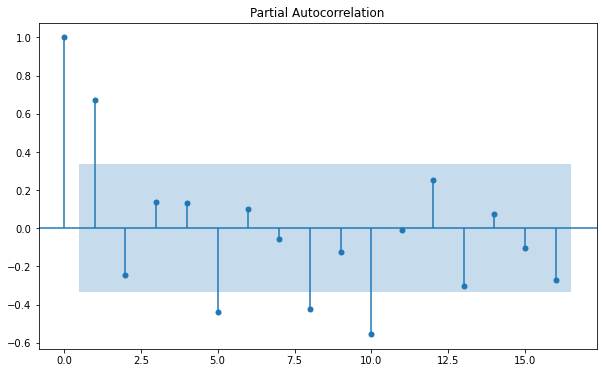

In [76]:
# remove trend form waiting list
data2 = allTS['Size_of_waiting_list'] - allTS['Size_of_waiting_list'].shift(1)
plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_pacf(data2[1:], lags=16)

data2.to_excel("Data/TS2_trend.xlsx")

In [45]:
# stationarity
# try with the removed trend data

X = data2[1:].values

result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
    
#p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

ADF Statistic: -4.748902
p-value: 0.000068
Critical Values:
	1%: -3.753
	5%: -2.998
	10%: -2.639


## Forecasting

Text(0, 0.5, 'main')

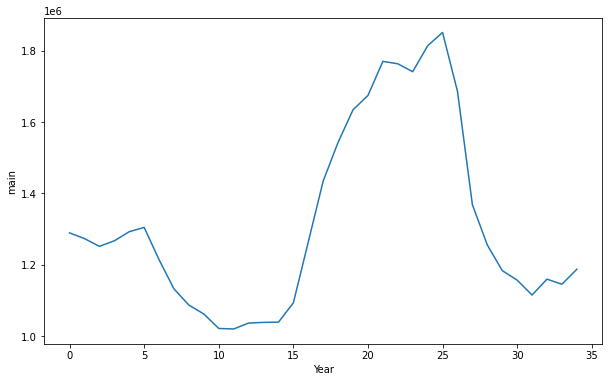

In [67]:
df_focus = waiting2
ax = df_focus.plot()
ax.set_xlabel("Year")
ax.set_ylabel("main")

C:\Users\linda\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


1652948955768.483 539612899152.4625 278788743190.74304


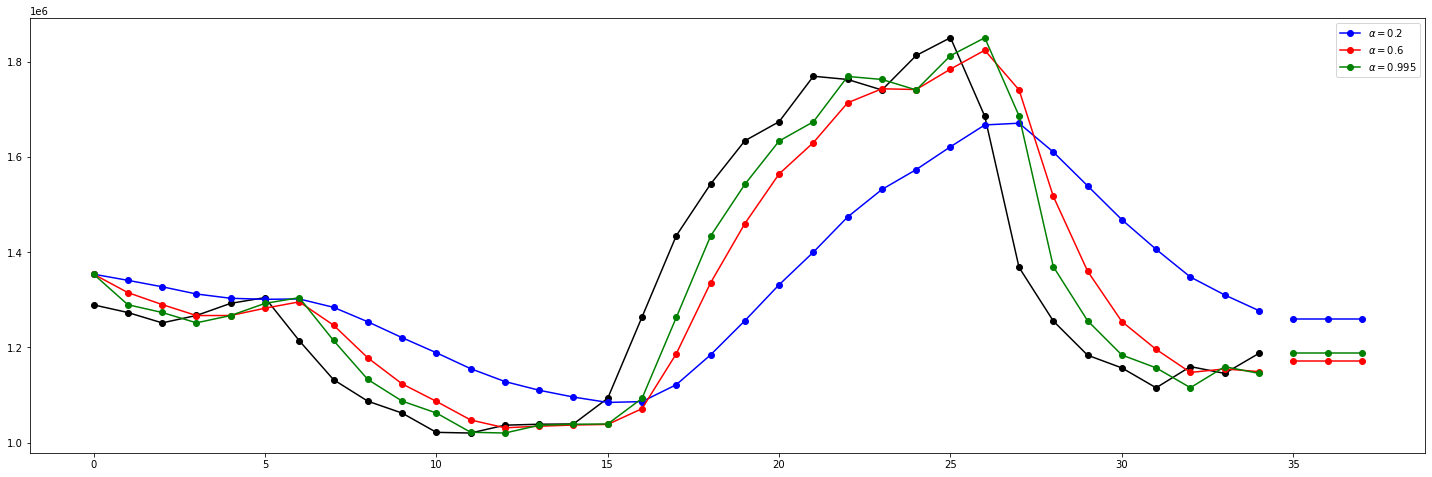

In [69]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

fit1 = SimpleExpSmoothing(df_focus, initialization_method="heuristic").fit(
    smoothing_level=0.2, optimized=False
)
fcast1 = fit1.forecast(3).rename(r"$\alpha=0.2$")
fit2 = SimpleExpSmoothing(df_focus, initialization_method="heuristic").fit(
    smoothing_level=0.6, optimized=False
)
fcast2 = fit2.forecast(3).rename(r"$\alpha=0.6$")
fit3 = SimpleExpSmoothing(df_focus, initialization_method="estimated").fit()
fcast3 = fit3.forecast(3).rename(r"$\alpha=%s$" % fit3.model.params["smoothing_level"])

plt.figure(figsize=(25, 8))
plt.plot(df_focus, marker="o", color="black")
plt.plot(fit1.fittedvalues, marker="o", color="blue")
(line1,) = plt.plot(fcast1, marker="o", color="blue")
plt.plot(fit2.fittedvalues, marker="o", color="red")
(line2,) = plt.plot(fcast2, marker="o", color="red")
plt.plot(fit3.fittedvalues, marker="o", color="green")
(line3,) = plt.plot(fcast3, marker="o", color="green")
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])
print(fit1.sse, fit2.sse, fit3.sse)

356119946187.9331 370344803910.19257 349072027981.60815


C:\Users\linda\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


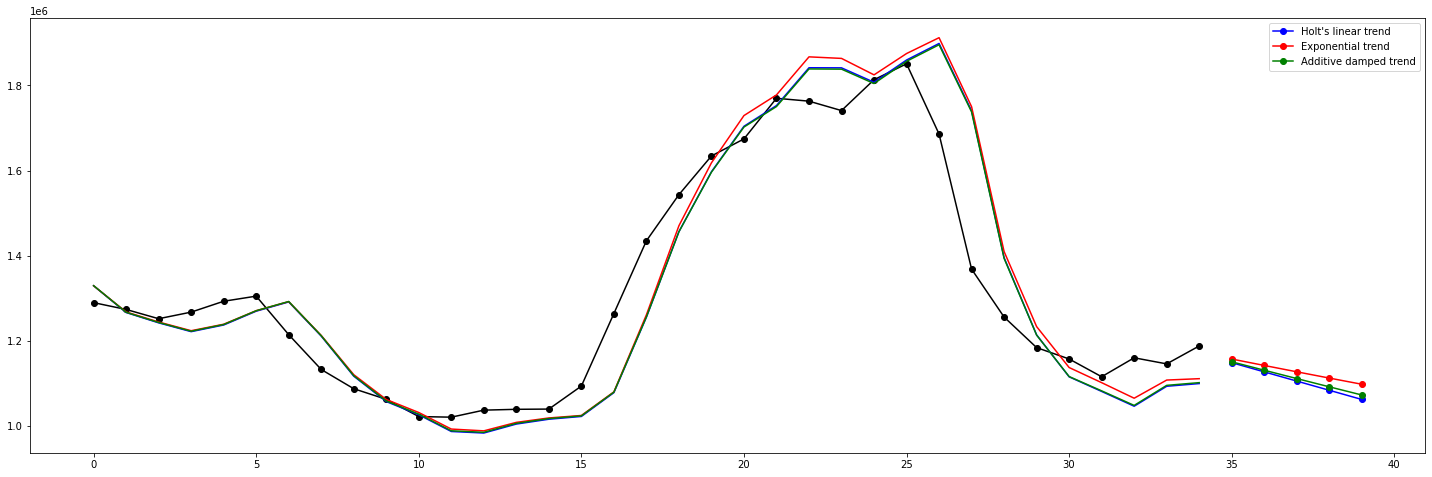

In [66]:
# holts method

fit1 = Holt(df_focus, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2, optimized=False
)
fcast1 = fit1.forecast(5).rename("Holt's linear trend")
fit2 = Holt(df_focus, exponential=True, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2, optimized=False
)
fcast2 = fit2.forecast(5).rename("Exponential trend")
fit3 = Holt(df_focus, damped_trend=True, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2
)
fcast3 = fit3.forecast(5).rename("Additive damped trend")

plt.figure(figsize=(25, 8))
plt.plot(df_focus, marker="o", color="black")
plt.plot(fit1.fittedvalues, color="blue")
(line1,) = plt.plot(fcast1, marker="o", color="blue")
plt.plot(fit2.fittedvalues, color="red")
(line2,) = plt.plot(fcast2, marker="o", color="red")
plt.plot(fit3.fittedvalues, color="green")
(line3,) = plt.plot(fcast3, marker="o", color="green")
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])
print(fit1.sse, fit2.sse, fit3.sse)

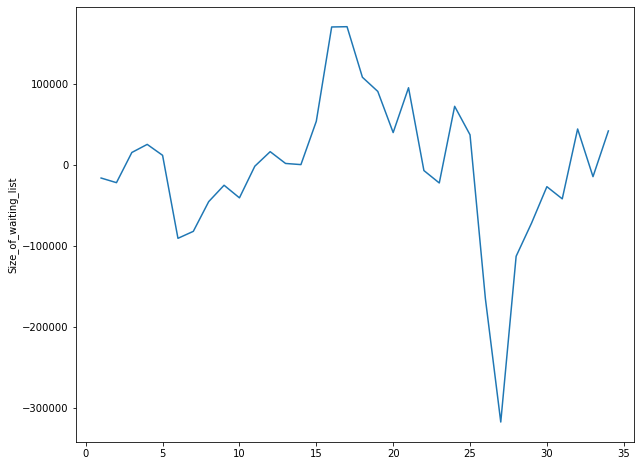

In [70]:
plt.figure(figsize=(10,8))
sns.lineplot(data=data2[1:], palette="deep");

In [92]:
from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

df_trend2 = pd.read_excel (r"Data/TS2_trend.xlsx", sheet_name=0)
train_data = df_trend2['Size_of_waiting_list'][:len(df)-100]
test_data = df_trend2['Size_of_waiting_list'][len(df)-100:]

data = train_data

# fit model1
model = AutoReg(data, lags=8, old_names = True)
model_fit = model.fit()

print(model_fit.summary())
fig = plt.figure(figsize=(16, 9))

# fig = model_fit.plot_diagnostics(fig=fig, lags=30)
# fig = model_fit.plot_predict(start=None, end=None)

                             AutoReg Model Results                              
Dep. Variable:     Size_of_waiting_list   No. Observations:                   29
Model:                       AutoReg(8)   Log Likelihood                -257.354
Method:                 Conditional MLE   S.D. of innovations          50817.477
Date:                  Wed, 27 Apr 2022   AIC                             22.624
Time:                          02:49:48   BIC                             23.122
Sample:                               8   HQIC                            22.732
                                     29                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
intercept                4578.5908   1.23e+04      0.374      0.709   -1.94e+04    2.86e+04
Size_of_waiting_list.L1     1.1420      0.182      6.286      0.000       0.

<Figure size 1152x648 with 0 Axes>

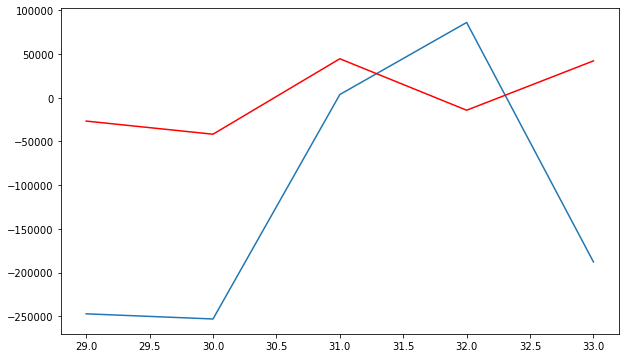

In [93]:
# Make the predictions
#
pred = model_fit.predict(start=len(data), end=(len(df_trend2)-1), dynamic=False)

# Plot the prediction vs test data
#
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test_data, color='red')

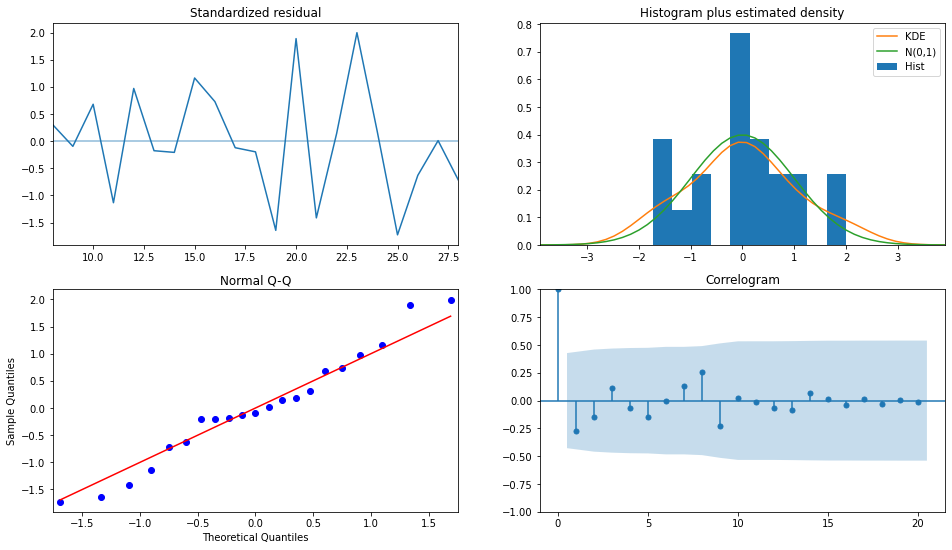

In [95]:
fig = plt.figure(figsize=(16, 9))
fig = model_fit.plot_diagnostics(fig=fig, lags=20)